# Hypothesis Testing with Insurance Data (Core)

In [1]:
#Full Name: Hannah Ploutz

## Tasks

Answer the following questions using Hypothesis skills:
- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

For each question, make sure to:

1. State your Null Hypothesis and Alternative Hypothesis
2. Select the correct test according to the data type and number of samples
3. Test the assumptions of your selected test.
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
5. Interpret your p-value and reject or fail to reject your null hypothesis 
6. Show a supporting visualization that helps display the result

## Import and Load the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
path = 'Data/insurance - insurance.csv'
df = pd.read_csv(path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Question 1: Do smokers have higher insurance charges than non-smokers?

**1. State your Null Hypothesis and Alternative Hypothesis**

- `Null Hypothesis`: The mean insurance charge of smokers is equal to the mean insurance charge of non-smokers.
- `Alternative Hypothesis`: The mean insurance charge of smokers is not equal to the mean insurance charge of non-smokers.

**2. Select the correct test according to the data type and number of samples**

- We are comparing means of two independent groups (smokers and non-smokers), so a we will use a `two-sample t-test`

**3. Test the assumptions of your selected test.**

Before proceeding with the t-test, we should test for the following assumptions:

- No significant outliers
- Normality of the distribution
- Equal variance in both groups

In [4]:
#find the mean
#smokers with charges
smoker_charge = df.loc[ df['smoker']=='yes',"charges"]
#non smokers with charges
nonsmoker_charge = df.loc[ df['smoker']=='no',"charges"]
print(f"For smokers (n={len(smoker_charge)}): Mean={np.mean(smoker_charge):.2f}")
print(f"For non-smokers (n={len(nonsmoker_charge)}): Mean={np.mean(nonsmoker_charge):.2f}")

For smokers (n=274): Mean=32050.23
For non-smokers (n=1064): Mean=8434.27


**A. Test for outliers**

In [5]:
#test for outliers
#smokers
zscores_s = stats.zscore(smoker_charge)
outliers_s = abs(zscores_s)>3
np.sum(outliers_s)

0

- There are no outliers for smokers

In [6]:
#test for outliers
#non smokers
zscores_n = stats.zscore(nonsmoker_charge)
outliers_n = abs(zscores_n)>3
np.sum(outliers_n)

24

- There are 24 outliers for nonsmokers

In [7]:
#remove the outliers for non smokers
nonsmoker_charge = nonsmoker_charge[(np.abs(stats.zscore(nonsmoker_charge)) < 3)]

**B. Test each group for Normality**

In [8]:
# normal test smokers
result_s = stats.normaltest(smoker_charge)
result_s

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [9]:
# normal test nonsmokers
result_n = stats.normaltest(nonsmoker_charge)
result_n

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

- For both smokers and nonsmokers, they are signifigantly less than 0.05, so we proceed to test for variance

**C. Test for Variance**

In [10]:
#using Levene's test
result = stats.levene(smoker_charge, nonsmoker_charge)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

- The p-value is less than 0.05 so there is not equal variance

**4. Execute the selected test, or the alternative test (if you do not meet the assumptions)**

- After checking the assumptions, if all are met, we can conduct the two-sample t-test.
- Since there are not equal variances, we will use equal_var = False in the independent test

In [11]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(smoker_charge, nonsmoker_charge, equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

**5. Interpret your p-value and reject or fail to reject your null hypothesis**

- The p value is significantly less than alpha 0.05, so we reject the null hypothesis and conclude that there is a <br>
significant difference in insurance charges between smokers and non smokers.

**6. Show a supporting visualization that helps display the result**

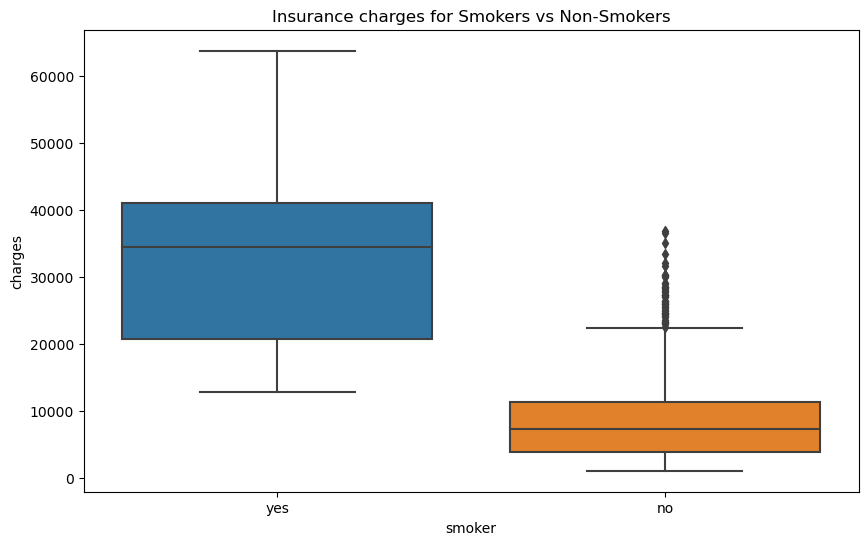

In [12]:
#Creating boxplot using seaborn to display the result
plt.figure(figsize=(10,6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Insurance charges for Smokers vs Non-Smokers')
plt.show()

- Viewing the boxplot above, it can be easily visualized that there is indeed a significant difference between those who smoke <br>
and those who dont, and their related insurance charges
- It looks like smokers have  higher amount of  charges compared to nonsmokers

### Question 2: Are men more likely to smoke than women?

**1. State your Null Hypothesis and Alternative Hypothesis**

- `Null Hypothesis`: The proportions of smokers among men and women are equal.
- `Alternative Hypothesis`: The proportions of smokers among men and women are not equal.

**2. Select the correct test according to the data type and number of samples**

- Since these are two categorical variables (sex and smoker), we will use the Chi-Square test for independence.

**3. Test the assumptions of your selected test.**

In [13]:
#using the Contingency Table with pd.crosstab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


**4. Execute the selected test, or the alternative test (if you do not meet the assumptions)**

In [14]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [15]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

**5. Interpret your p-value and reject or fail to reject your null hypothesis**

- The p-value is significantly less than 0.05, so we reject the null hypothesis
- There is a relationship between a persons sex and if they smoke or not

**6. Show a supporting visualization that helps display the result**

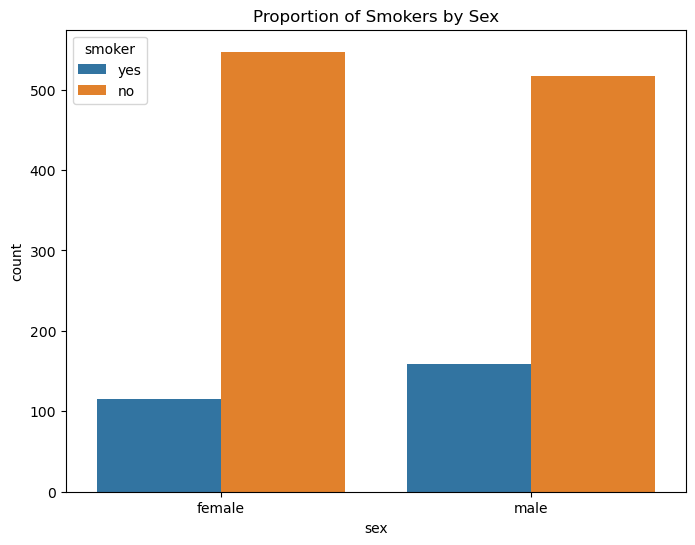

In [16]:
# Plot the proportion of smokers by sex
plt.figure(figsize=(8,6))
sns.countplot(x='sex', hue='smoker', data=df)
plt.title('Proportion of Smokers by Sex')
plt.show()

- Viewing the above visualization, there is a very large difference between sex and those who smoke v those who don't

### Question 3: Do different regions have different charges, on average?

**1. State your Null Hypothesis and Alternative Hypothesis**

- `Null Hypothesis`: The means of the charges are the same in all regions.
- `Alternative Hypothesis`: The means of the charges are different in at least two regions.

**2. Select the correct test according to the data type and number of samples**

- We're comparing the means of a numeric variable (charges) across more than two groups (regions), so we'll use the one-way ANOVA test.

**3. Test the assumptions of your selected test.**

Checking for the following assumptions:
- no significant outliers
- normality
- equal variance.

**A. No Significant Outliers**

In [17]:
# Test for outliers
zscores = np.abs(stats.zscore(df['charges']))
df = df[zscores < 3]

**B. Normality**

In [18]:
#first start with seperating the groups, then test for normality
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [19]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,323.0,1.718876e-22,100.230402
southeast,362.0,1.936990e-13,58.544942
northwest,323.0,9.182483e-21,92.273979
northeast,323.0,6.205365e-18,79.242235


In [20]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,323.0,1.718876e-22,100.230402,True
southeast,362.0,1.936990e-13,58.544942,True
northwest,323.0,9.182483e-21,92.273979,True
northeast,323.0,6.205365e-18,79.242235,True


- Each group does `not` have a normal distribution

**C. Equal Variance**

In [21]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=5.894904759083203, pvalue=0.0005382763869610836)

- For Levene's test, the p-value is less than 0.05, indicating that the variances of charges across different regions are `not` equal.

**4. Execute the selected test, or the alternative test (if you do not meet the assumptions)**

- The results are that the assumptions were not met due to it not having normal distribution and the p-value being < 0.05.
- We will be proceeding with `Kruskal-Wallis` test as the alternative
- Kruskal-Wallis test doesn't assume normality or equal variances

In [22]:
from scipy.stats import kruskal

stat, p = kruskal(df['charges'][df['region'] == 'southwest'],
                  df['charges'][df['region'] == 'southeast'],
                  df['charges'][df['region'] == 'northwest'],
                  df['charges'][df['region'] == 'northeast'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=5.119, p=0.163


**5. Interpret your p-value and reject or fail to reject your null hypothesis**

- The p-value is greater than alpha of 0.05, so we fail to reject the null hypothesis
- There is no significant difference between the groups

**6. Show a supporting visualization that helps display the result**

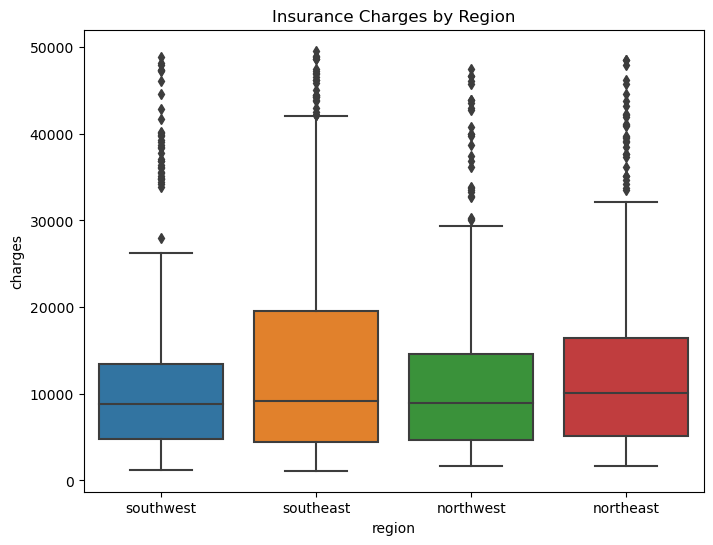

In [23]:
#boxplot to show the insurance charges per region
plt.figure(figsize=(8,6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Insurance Charges by Region')
plt.show()


- As seen above in the box and whiskers plot, there is not a huge significance difference between all the regions